In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [60]:
df = pd.read_csv("breast-cancer.csv")
df = shuffle(df)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
390,90317302,0,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,...,11.380,15.65,73.23,394.5,0.1343,0.1650,0.08615,0.06696,0.2937,0.07722
168,8712766,1,17.47,24.68,116.10,984.6,0.10490,0.16030,0.21590,0.10430,...,23.140,32.33,155.30,1660.0,0.1376,0.3830,0.48900,0.17210,0.2160,0.09300
340,89813,0,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,...,16.670,21.51,111.40,862.1,0.1294,0.3371,0.37550,0.14140,0.3053,0.08764
116,864726,0,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,...,9.414,17.07,63.34,270.0,0.1179,0.1879,0.15440,0.03846,0.1652,0.07722
15,84799002,1,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,...,17.460,37.13,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,879830,1,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,...,19.800,25.05,130.00,1210.0,0.1111,0.1486,0.19320,0.10960,0.3275,0.06469
445,9110720,0,11.99,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,...,12.980,30.36,84.48,513.9,0.1311,0.1822,0.16090,0.12020,0.2599,0.08251
128,866458,0,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,...,16.110,18.33,105.90,762.6,0.1386,0.2883,0.19600,0.14230,0.2590,0.07779
282,89122,1,19.40,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.09464,...,23.790,28.65,152.40,1628.0,0.1518,0.3749,0.43160,0.22520,0.3590,0.07787


In [8]:
df.shape

(569, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 501 to 306
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se            

In [102]:
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,30371831.43,1.250206e+08,8670.00,869218.00,906024.00,8813129.00,9.113205e+08
diagnosis,569.0,0.37,4.800000e-01,0.00,0.00,0.00,1.00,1.000000e+00
radius_mean,569.0,13.87,3.100000e+00,6.98,11.70,13.37,15.46,2.175000e+01
texture_mean,569.0,19.12,4.000000e+00,9.71,16.17,18.84,21.60,2.997000e+01
perimeter_mean,569.0,90.28,2.140000e+01,43.79,75.17,86.24,102.40,1.473000e+02
area_mean,569.0,610.27,2.676300e+02,143.50,420.30,551.10,710.60,1.326000e+03
smoothness_mean,569.0,0.10,1.000000e-02,0.06,0.09,0.10,0.10,1.300000e-01
compactness_mean,569.0,0.10,4.000000e-02,0.02,0.06,0.09,0.13,2.300000e-01
concavity_mean,569.0,0.08,6.000000e-02,0.00,0.03,0.06,0.12,2.800000e-01
concave points_mean,569.0,0.05,3.000000e-02,0.00,0.02,0.03,0.07,1.500000e-01


In [70]:
# Break up data into chunks for visualization and correlation
num1 = [
       'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
      ]
num2 = [
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'
      ]

In [176]:
pp1 = [
        'diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean',
      ]
pp2 = [
        'diagnosis', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
        'fractal_dimension_mean', 'radius_se', 'texture_se',
        'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       ]
pp3 = [
        'diagnosis','concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'
      ]
pp4 = [
        'diagnosis','smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'
        ]


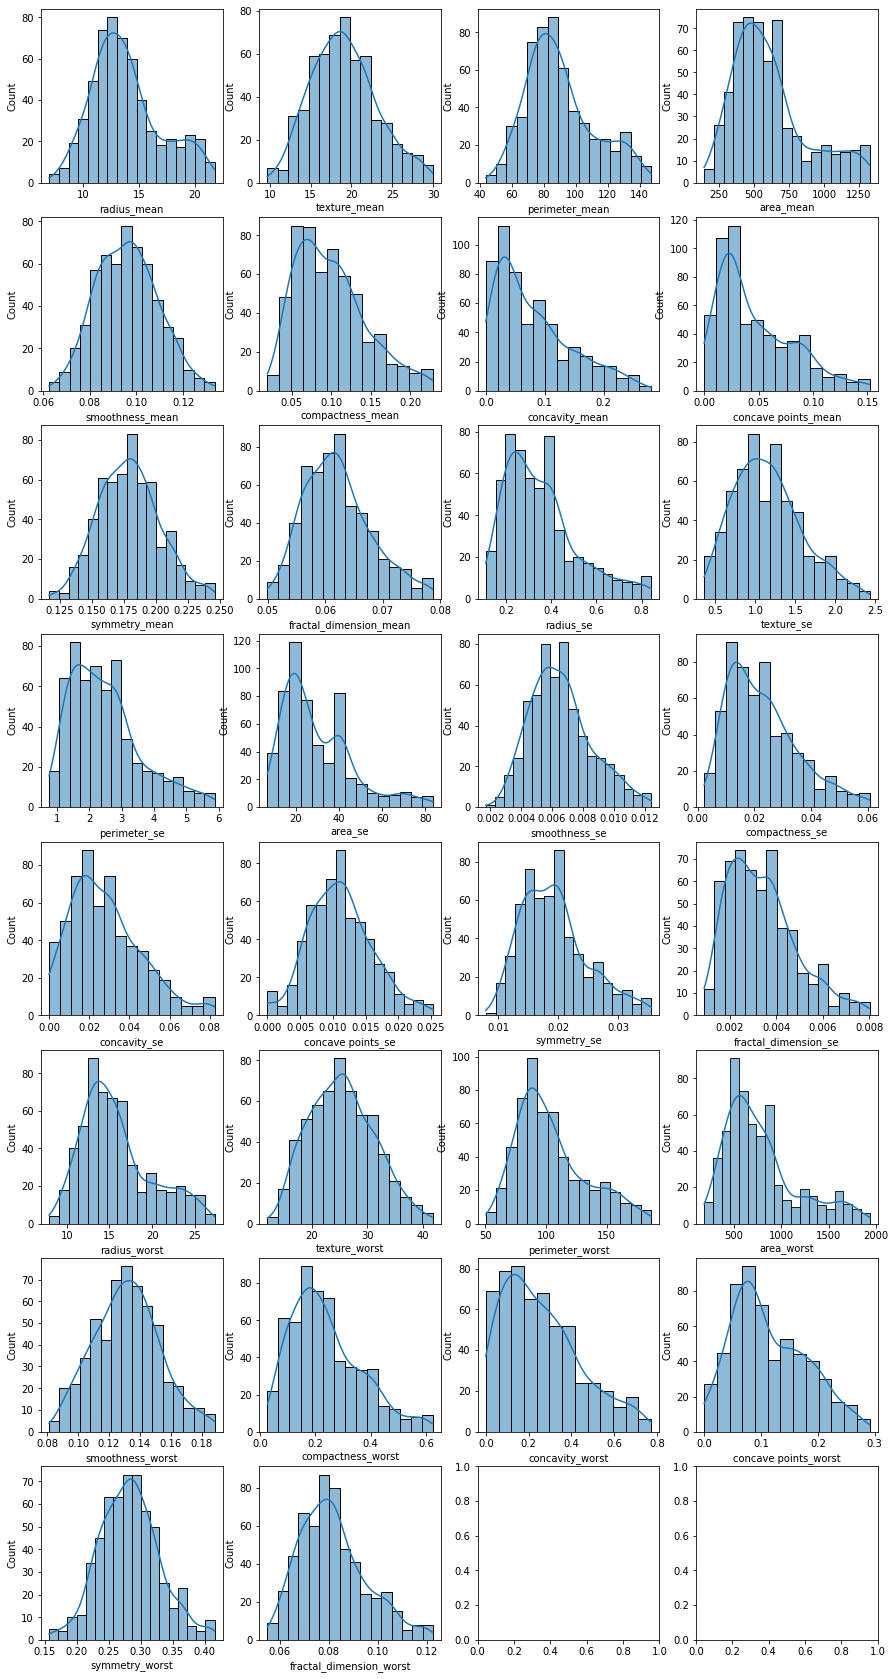

In [175]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
fig.set_size_inches(15, 30)  # ( x , y )
axes = axes.ravel()  # flattening the array makes indexing easier
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax = ax)

plt.show()

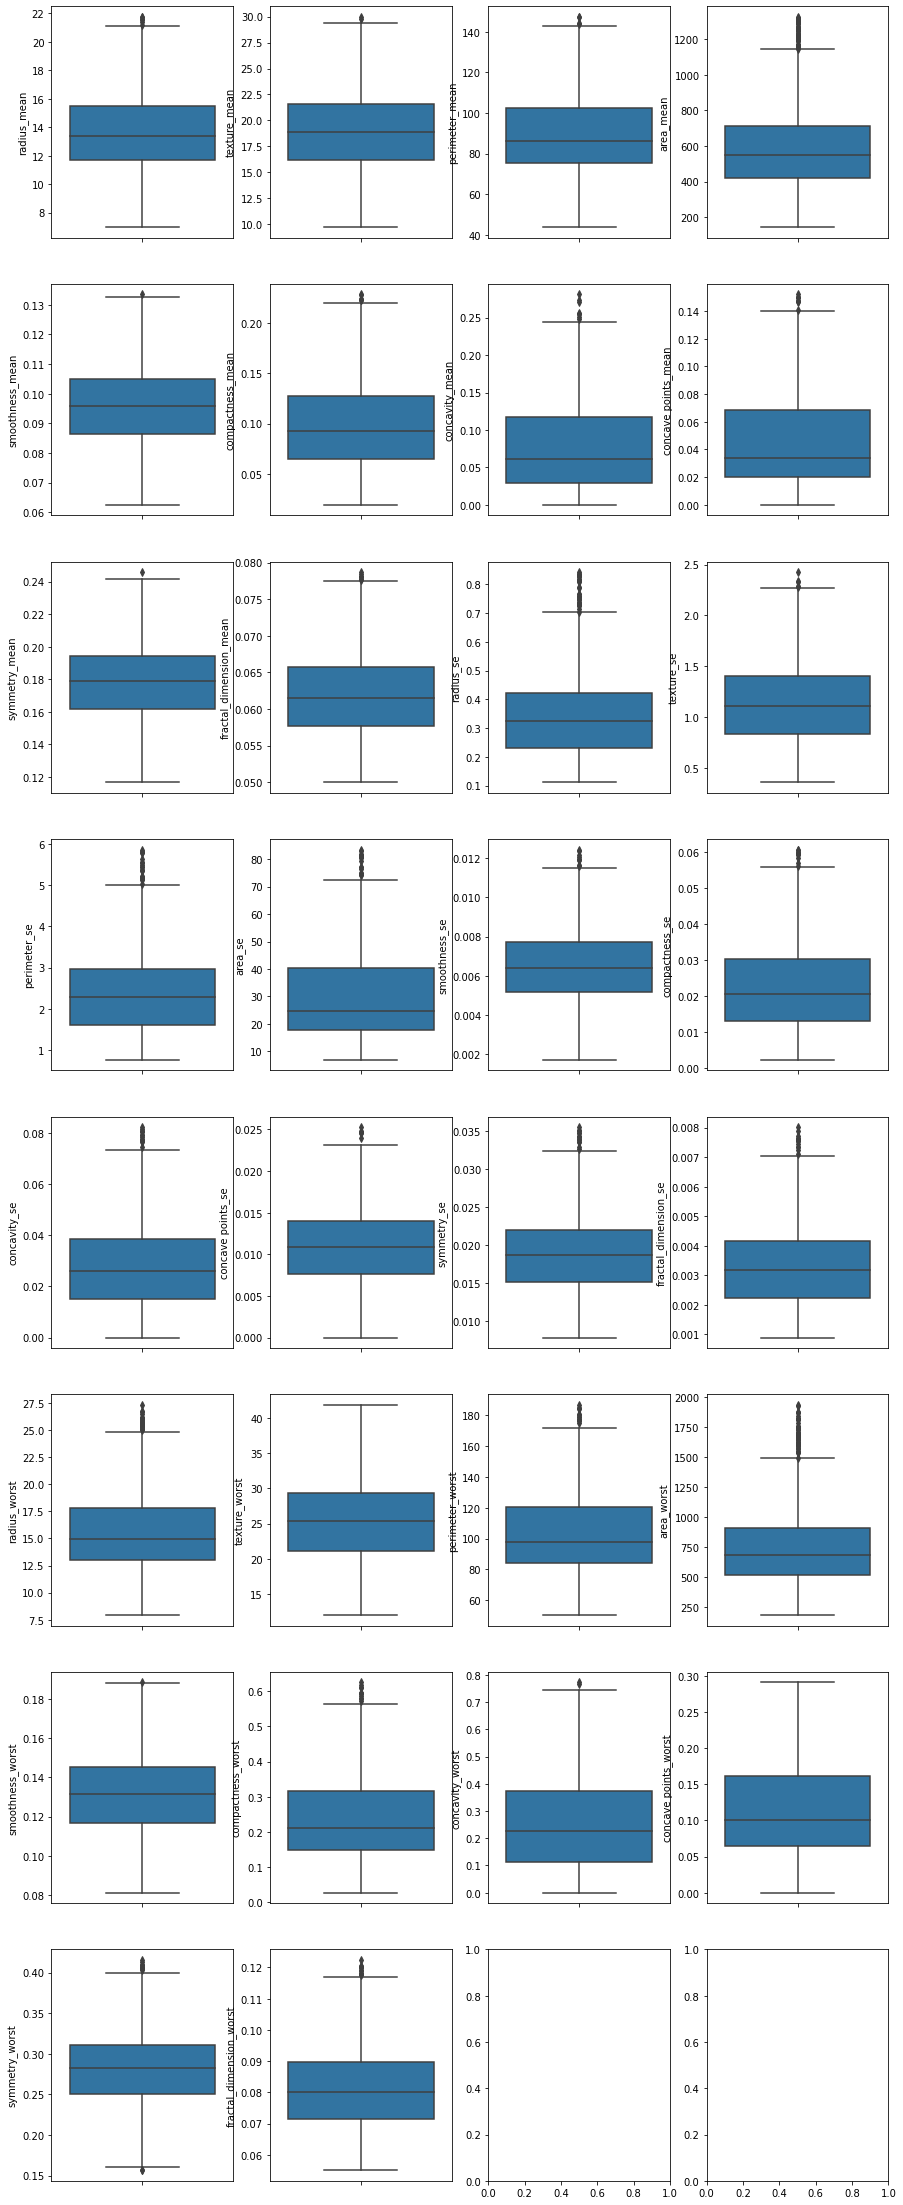

In [173]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
axes = axes.ravel()  # flattening the array makes indexing easier
fig.set_size_inches(15, 40)  # ( x , y )
for col, ax in zip(cols, axes):
    sns.boxplot(ax =ax,y=df[col])

plt.show()

In [61]:
# Calculate IQR
q75, q25 = np.percentile(df['area_worst'], [75 ,25])
IQR = q75 - q25

# Calculate lower and upper bounds
lower_bound = q25 - (IQR * 1.5)
upper_bound = q75 + (IQR * 1.5)

# Select rows that are outside the bounds
df_outliers = df.query('area_worst < @lower_bound or area_worst > @upper_bound')
df_outliers # 35 outliers

In [63]:
# Remove Outliers, Copy orig df before 
df_orig = df.copy()
num = num1 + num2
for i in num:
    q75, q25 = np.percentile(df.loc[:,i],[75,25])
    IQR = q75 - q25
    max = q75 + 1.5*IQR
    min = q25 - 1.5*IQR
    df.loc[df[i] > max, i] = df[i].mean()
    df.loc[df[i] < min, i] = df[i].mean()

In [66]:
# Select rows that are outside the bounds
df_outliers = df.query('area_worst < @lower_bound or area_worst > @upper_bound')
df_outliers # outliers removed

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


**Working with two datasets at this point. The one with outliers adjusted and the original.  Doing this to see the impact of adjusting the means.** 

In [67]:
cor = df.corr().round(2)
cor.sort_values(['diagnosis'],ascending=False,inplace=True)
cor.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.79
radius_worst               0.78
concave points_mean        0.78
area_worst                 0.76
perimeter_mean             0.74
concavity_mean             0.74
area_mean                  0.72
radius_mean                0.72
area_se                    0.68
concavity_worst            0.68
radius_se                  0.58
compactness_worst          0.58
perimeter_se               0.58
compactness_mean           0.57
concave points_se          0.46
texture_worst              0.44
concavity_se               0.44
smoothness_worst           0.42
texture_mean               0.41
smoothness_mean            0.37
compactness_se             0.36
symmetry_worst             0.35
symmetry_mean              0.33
fractal_dimension_worst    0.29
fractal_dimension_se       0.19
id                         0.04
texture_se                 0.01
fractal_dimension_mean    -0.00
smoothness_se             -0.02
symmetry

In [68]:
cor2 = df_orig.corr().round(2)
cor2.sort_values(['diagnosis'],ascending=False,inplace=True)
cor2.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
radius_mean                0.73
area_worst                 0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
id                         0.04
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothne

## Modeling

In [195]:
model_features = 'concave points_worst','perimeter_worst','radius_worst',\
                 'concave points_mean','area_worst','perimeter_mean','concavity_mean',\
                 'area_mean','radius_mean','area_se','concavity_worst','radius_se',\
                 'compactness_worst','perimeter_se','compactness_mean'
            
# model_features =   [ 'concave points_worst','perimeter_worst','radius_worst',
#                     'concave points_mean','area_worst','perimeter_mean','concavity_mean',
#                     'area_mean','radius_mean','area_se','concavity_worst','radius_se',
#                     'compactness_worst','perimeter_se','compactness_mean' 
#                    ]

In [196]:
# Test Split
# X = df.loc[:,model_features]
# y = df.loc[:,'diagnosis']

X = df.loc[:,model_features].values 
y = df.loc[:,'diagnosis'].values

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [198]:
print('DType:\nX_train:{}, y_train:{}\nShape:\nX_train:{}, y_train:{}\nType:\nX_train:{}, y_train{}'
      .format(X_train.dtype,y_train.dtype,X_train.shape,y_train.shape,type(X_train),type(y_train)))

DType:
X_train:float64, y_train:int64
Shape:
X_train:(455, 15), y_train:(455,)
Type:
X_train:<class 'numpy.ndarray'>, y_train<class 'numpy.ndarray'>


### Logistic Regression

In [199]:
lgreg = LogisticRegression(max_iter=200)
lgreg.fit(X_train.ravel(), y_train.ravel())
threshold = 0.5
# y_pred = lgreg.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1.185e-01 1.292e+02 2.058e+01 ... 7.776e-02 7.570e-01 3.393e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [161]:
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

(455, 15)
(455,)
float64
int64
